In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression

In [11]:
cars= pd.read_csv(r"C:\Users\hanee\OneDrive\Desktop\automobile\imports-85.data", names= ["symboling","normalized-losses",
                  "make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base",
                  "length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system",
                   "bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"],index_col=False
                 )

In [12]:
cars.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [13]:
#replacing "-" with "_" in the feature names
cars= cars.rename(columns= lambda x: x.replace("-", "_"))

In [14]:
cars.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [15]:
len(cars)

205

In [16]:
cars= cars.drop(["normalized_losses","aspiration","engine_location","engine_type","fuel_system"],axis= 1)

In [17]:
cars.head(2).transpose()

,0,1
symboling,3,3
make,alfa-romero,alfa-romero
fuel_type,gas,gas
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8


In [18]:
cars["drive_wheels"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [19]:
cars["drive_wheels"].value_counts()

drive_wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [20]:
cars["body_style"].value_counts()

body_style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [21]:
cars["make"].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [22]:
cars=cars.drop(["drive_wheels","body_style","make"],axis=1)

In [23]:
cars.head(2).transpose()

,0,1
symboling,3,3
fuel_type,gas,gas
num_of_doors,two,two
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8
curb_weight,2548,2548
num_of_cylinders,four,four
engine_size,130,130


In [24]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [25]:
num_columns= ["bore","stroke","horsepower","peak_rpm","price"]
cars[num_columns]= cars[num_columns].apply(pd.to_numeric, errors= "coerce")

#cars[num_columns]=cars[num_columns].astype(float)

In [26]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [27]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [28]:
cars["num_of_doors"].value_counts()

num_of_doors
four    114
two      89
?         2
Name: count, dtype: int64

In [29]:

cars=cars.replace("?",np.nan)

In [30]:
cars["num_of_doors"].value_counts()

num_of_doors
four    114
two      89
Name: count, dtype: int64

In [31]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         2
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

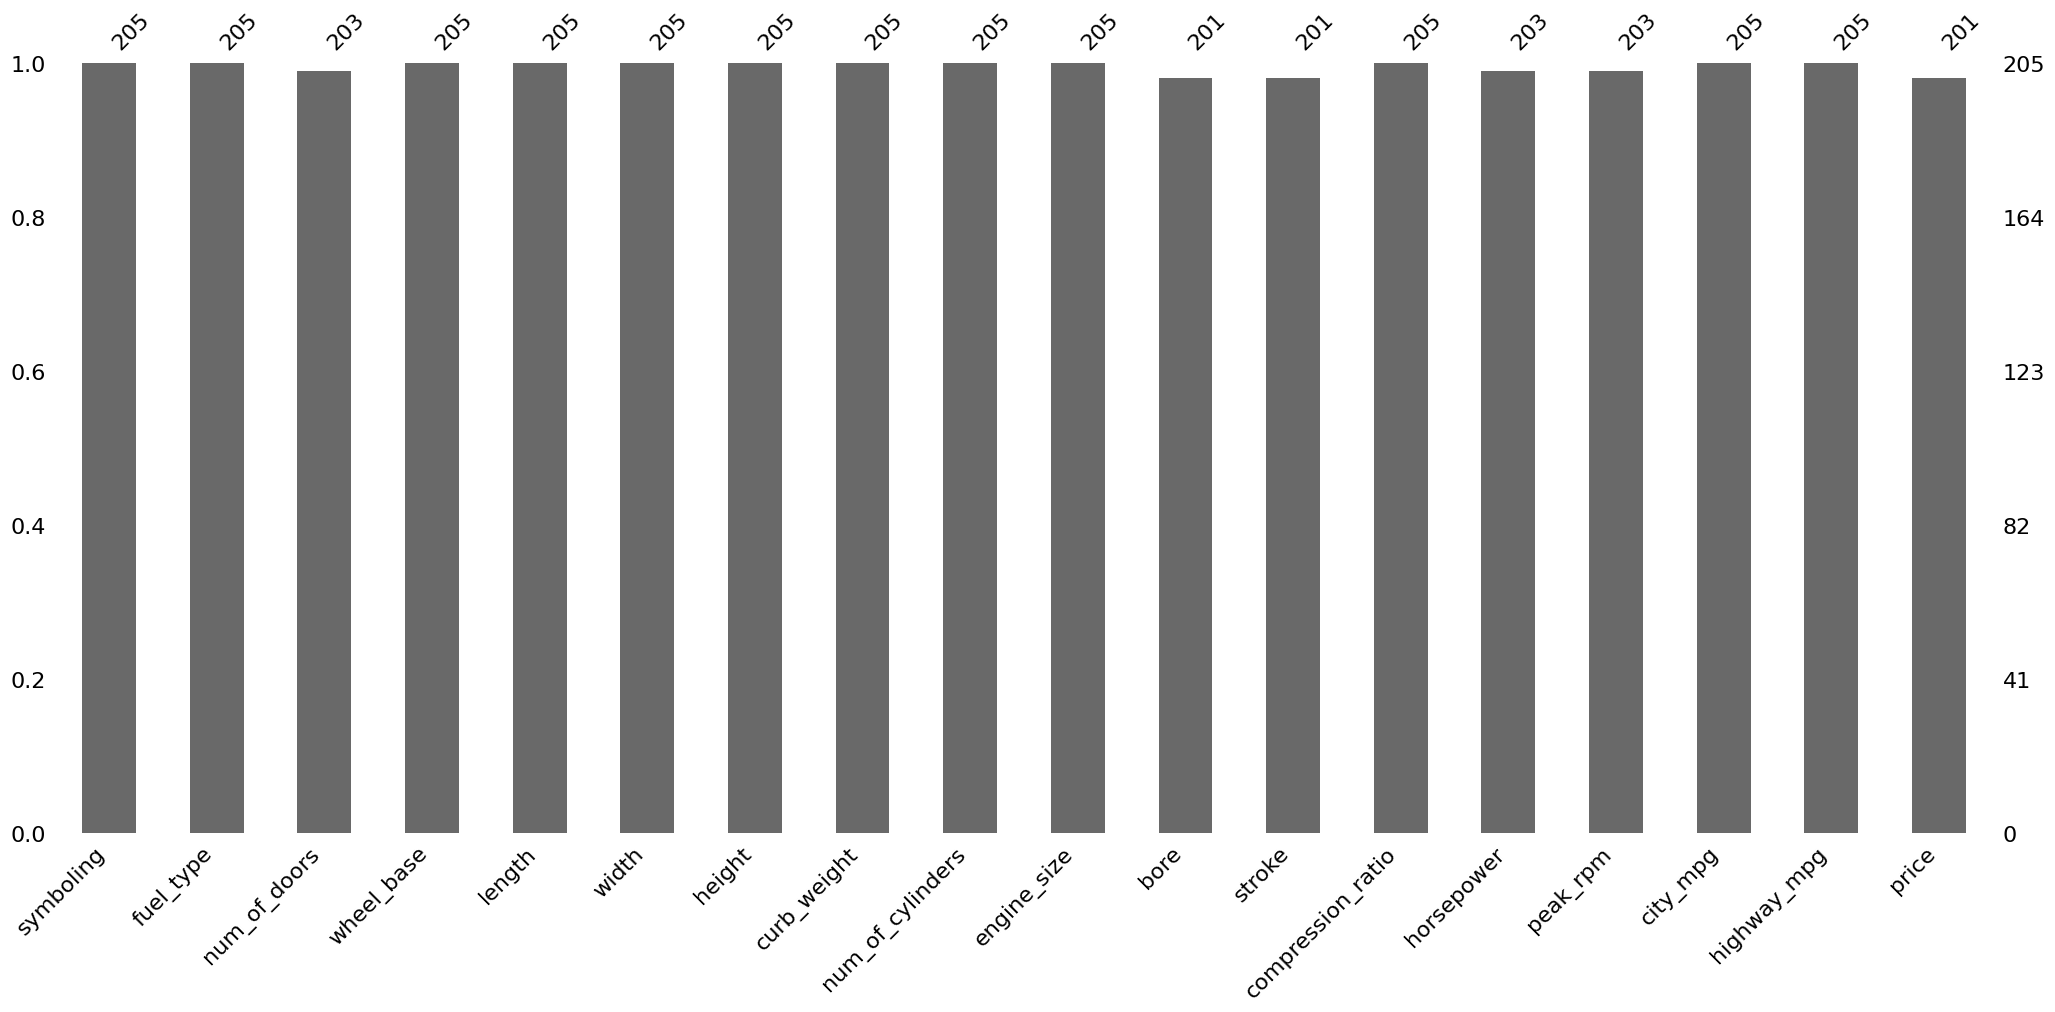

In [32]:


msno.bar(cars)
plt.show()

In [33]:
cat_to_fill= ["num_of_doors"]


imputer= SimpleImputer(strategy= "most_frequent")
cars[cat_to_fill]= imputer.fit_transform(cars[cat_to_fill])


In [34]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [35]:
num_to_fill= ["bore","stroke","horsepower","peak_rpm","price"]


imputer= SimpleImputer(strategy= "median")
cars[num_to_fill]= imputer.fit_transform(cars[num_to_fill])

In [36]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [37]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [38]:
# going with Label encoding


le= LabelEncoder()
cars["num_of_doors"]= le.fit_transform(cars["num_of_doors"])


In [39]:
# going with one-hot-encoding

cars= pd.get_dummies(cars, columns=["fuel_type"], prefix= "fuel_type", drop_first= True)

In [40]:
cars["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [41]:
# going with replace function

cylinder_dict={"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}
cars["num_of_cylinders"]= cars["num_of_cylinders"].replace(cylinder_dict)

# going with using map

# cars["num_of_cylinders"]= cars["num_of_cylinders"].map(cylinder_dict)

In [42]:
cars.dtypes

symboling              int64
num_of_doors           int32
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
fuel_type_gas           bool
dtype: object

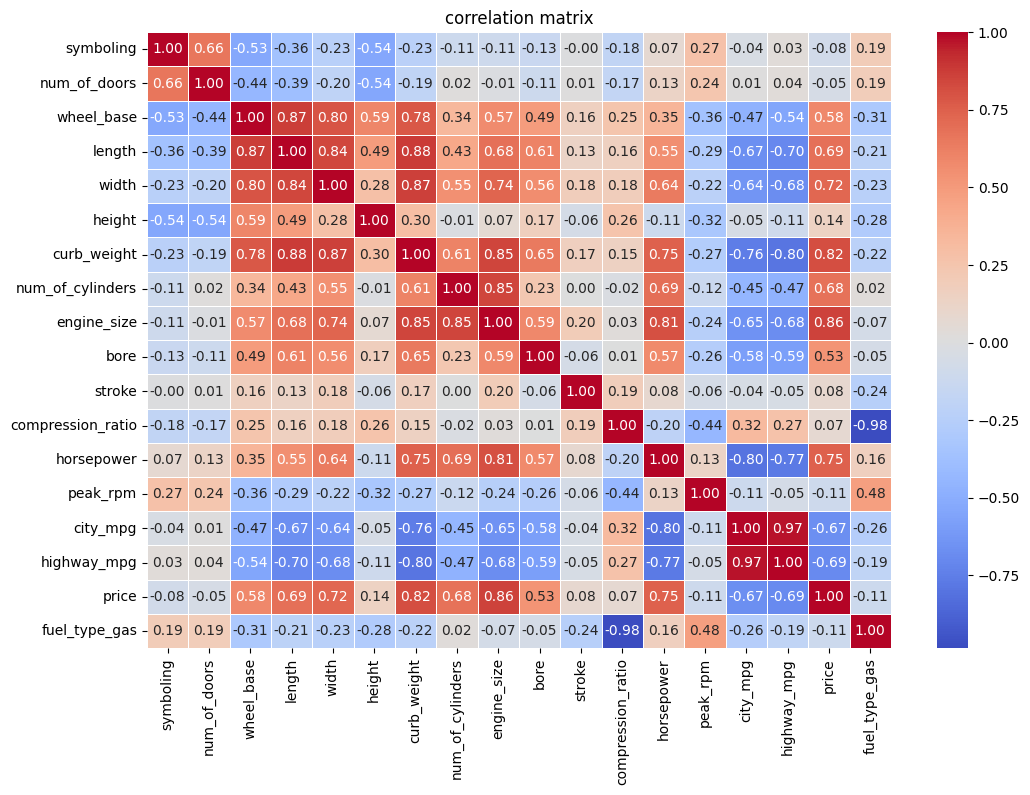

In [43]:


cars_corr= cars.corr()

plt.figure(figsize= (12,8))
sns.heatmap(cars_corr, annot=True, cmap="coolwarm", fmt= ".2f", linewidths=0.5, mask= None)
plt.title("correlation matrix")
plt.show()

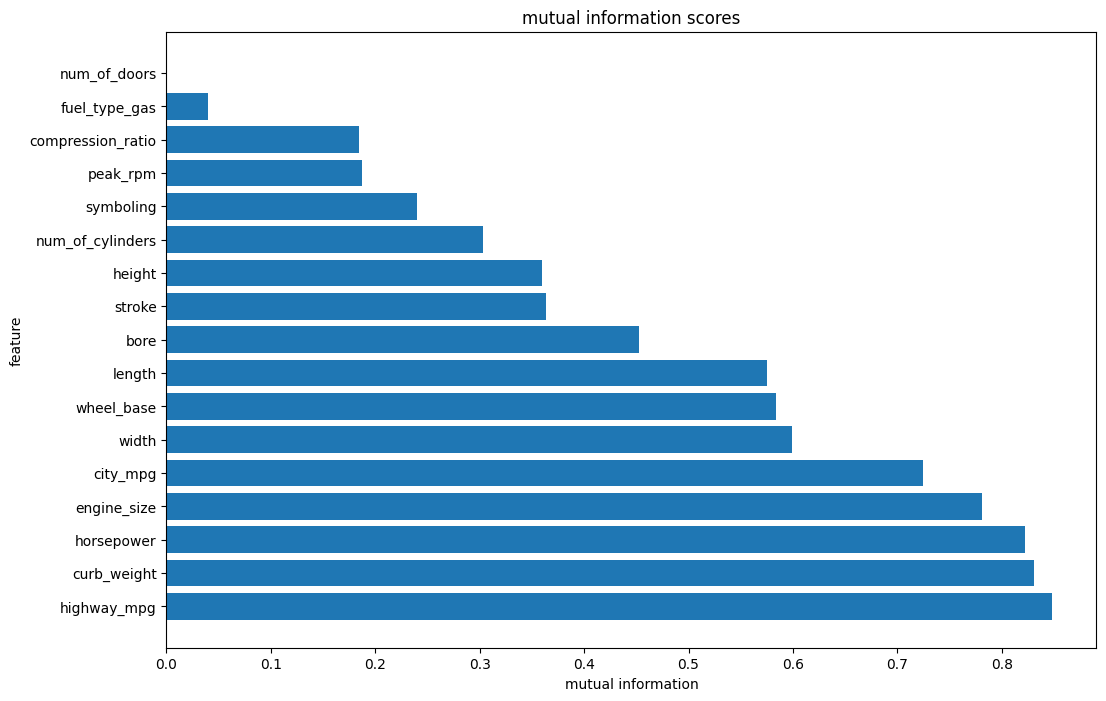

In [44]:


target= "price"
feature_cols= ['symboling', 'num_of_doors', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'fuel_type_gas']

mi_score= mutual_info_regression(cars[feature_cols],cars[target])
mi_df= pd.DataFrame({"feature":feature_cols, "mutual_info":mi_score}).sort_values(
                           by= "mutual_info", ascending= False)

plt.figure(figsize= (12,8))
plt.barh(mi_df["feature"], mi_df["mutual_info"])
plt.xlabel("mutual information")
plt.ylabel("feature")
plt.title("mutual information scores")
plt.show()

In [45]:
cars=cars.drop(["num_of_doors","fuel_type_gas"],axis= 1)

In [46]:
cars.head(2)

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [47]:
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


In [48]:
#sns.pairplot(cars, diag_kind= "kde")

In [49]:
# sns.pairplot(cars, diag_kind= "hist")

In [50]:
#from ydata_profiling import ProfileReport


In [51]:
#profiling= ProfileReport(cars)

In [52]:
# profiling.to_file("cars_profiling.html")
# profiling.to_file("cars_profiling.json")

In [53]:
X= cars.drop("price",axis= 1)
y= cars["price"]

In [54]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25,random_state=42)

In [56]:
len(X_train), len(y_train)

(153, 153)

In [57]:
type(X_train)

pandas.core.frame.DataFrame

In [58]:
len(X_test), len(y_test)

(52, 52)

In [59]:
# applying scaling(doing scaling after splitting the data to avoid data leakage)

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [60]:
X_train_scaled


array([[ 0.08378916, -0.70461455, -0.7501556 , ..., -0.73328838,
         3.27147184,  3.06912659],
       [-1.5186785 ,  0.61600509,  0.1019818 , ..., -1.96168022,
         0.66621385,  0.56388421],
       [ 0.08378916, -0.70461455, -0.34476985, ...,  0.08563952,
         0.9918711 ,  1.03361716],
       ...,
       [ 0.08378916, -0.70461455, -0.7501556 , ...,  0.08563952,
         0.9918711 ,  1.03361716],
       [ 1.68625681,  0.69958861,  0.7555629 , ...,  0.08563952,
        -0.96207239, -1.00189228],
       [-0.71744467,  0.28167101,  0.84656787, ...,  0.08563952,
        -1.28772964, -1.31504757]])

In [61]:
y_train

90      7099.0
173     8948.0
93      7349.0
5      15250.0
167     8449.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 153, dtype: float64

In [62]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [63]:
lr.coef_

array([  134.60322345,   341.60615485,  -284.30362706,   827.33507208,
         546.4511263 ,  -663.35989721, -3227.9895498 ,  9458.89660595,
       -1577.30101588, -1659.54154748,  1279.62884582,   -26.75751981,
        1307.36789104, -1232.4526544 ,  -797.84307232])

In [64]:
lr.intercept_

13238.418300653595

In [65]:
y_pred= lr.predict(X_test_scaled)

In [66]:
y_pred

array([27676.39401536, 15121.34052339, 10433.10172597, 14454.56554049,
       25202.83250742,  5953.74648655,  7629.32730463,  7060.07295734,
       10945.12648702,  8451.17045773, 16428.86301788,  6559.58435422,
       16190.33885762,  8593.23869609, 44462.7950513 ,  5913.6319862 ,
       -2450.15141163, 15906.91681232, 10289.332223  , 10703.97845519,
       10934.07336943, 22497.10848462,  6197.00625967, -1141.58524252,
        5998.24987413, 27313.73051213, 14329.47779308, 17196.96235424,
        5878.3288389 , 16958.22399659, 25018.2569301 ,  6026.71887815,
        7765.22872279, 23734.33684778,  8185.93668437, 24688.10931066,
       10121.93873222, 10812.91198253,  4380.80670695, 15728.21479081,
        9368.98238751, 12847.16010601, 19934.18064491,  6350.83293641,
        6301.1140821 , 10293.38760862,  6026.71887815,  8798.13561871,
       17519.80950471, 15600.31238404,  4533.94696023, 20291.0799088 ])

In [67]:
y_test

15     30760.0
9      10295.0
100     9549.0
132    11850.0
68     28248.0
95      7799.0
159     7788.0
162     9258.0
147    10198.0
182     7775.0
191    13295.0
164     8238.0
65     18280.0
175     9988.0
73     40960.0
152     6488.0
18      5151.0
82     12629.0
86      8189.0
143     9960.0
60      8495.0
101    13499.0
98      8249.0
30      6479.0
25      6692.0
16     41315.0
168     9639.0
195    13415.0
97      7999.0
194    12940.0
67     25552.0
120     6229.0
154     7898.0
202    21485.0
79      7689.0
69     28176.0
145    11259.0
55     10945.0
45     10295.0
84     14489.0
146     7463.0
66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
24      6229.0
139     7053.0
112    16900.0
29     12964.0
19      6295.0
178    16558.0
Name: price, dtype: float64

In [68]:
from sklearn.metrics import r2_score, mean_squared_error

r2= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test,y_pred)

In [69]:
r2

0.7979074738080436

In [70]:
mse

13571413.01615881

In [71]:
np.sqrt(mse)

3683.9398768382216

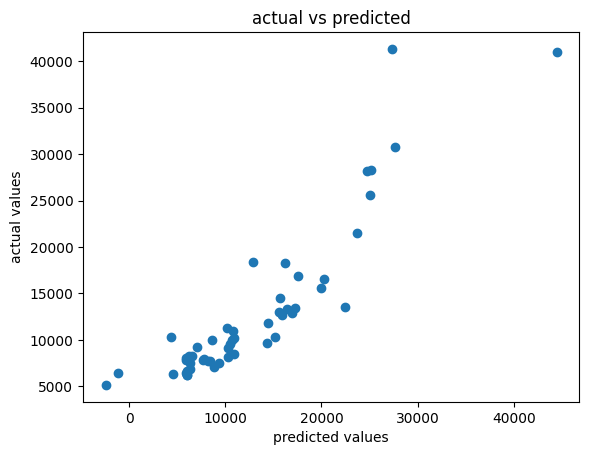

In [72]:
plt.scatter(y_pred, y_test)
plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.title("actual vs predicted")
plt.show()

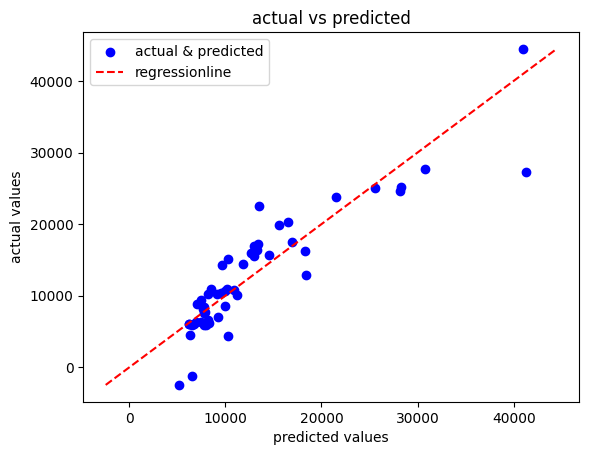

In [73]:
plt.scatter(y_test, y_pred, color="blue", label= "actual & predicted")

min_value= min(min(y_test), min(y_pred))
max_value=max(max(y_test), max(y_pred))

plt.plot([min_value, max_value],[min_value, max_value], color="red", linestyle= "--", label= "regressionline")

plt.xlabel("predicted values")
plt.ylabel("actual values")
plt.title("actual vs predicted")
plt.legend()
plt.show()

In [74]:
r2_adj= 1-(1-r2)*(len(cars)-1)/(len(cars)-X.shape[1]-1)


In [75]:
r2_adj

0.7818683844277297

In [76]:
X.shape


(205, 15)

In [77]:
X.shape[1]

15

OLS(ORDINARY LEAST SQUARE METHOD)

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [79]:
cars=pd.concat([X_train,y_train], axis=1)

In [80]:
cars.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [81]:
Incars= smf.ols(formula= "price~symboling+wheel_base+length+width+height+curb_weight+num_of_cylinders+engine_size+bore+stroke+compression_ratio+\
                horsepower+peak_rpm+city_mpg+highway_mpg", data= cars).fit()

In [82]:
#Incars.params

In [83]:
print(Incars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     44.67
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           3.44e-45
Time:                        08:04:54   Log-Likelihood:                -1451.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     137   BIC:                             2983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.053e+04   1.84e+0

In [84]:
# we can achieve the above by without using concatinating X_train, y_train

X_train_const= sm.add_constant(X_train)

In [85]:
cars_model_ols= sm.OLS(y_train, X_train_const).fit()


In [86]:
#cars_model_ols.params

In [87]:
print(cars_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     44.67
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           3.44e-45
Time:                        08:04:55   Log-Likelihood:                -1451.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     137   BIC:                             2983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.053e+04   1.84e+0

In [88]:
# using scaled X_train 

X_train_scaled_const= sm.add_constant(X_train_scaled)

In [89]:
ols_scaled_model= sm.OLS(y_train, X_train_scaled_const).fit()

In [90]:
#ols_scaled_model.params

In [91]:
print(ols_scaled_model.summary(xname= ["const"]+list(X_train.columns)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     44.67
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           3.44e-45
Time:                        08:04:55   Log-Likelihood:                -1451.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     137   BIC:                             2983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.324e+04    272.48

In [92]:
X_test_scaled_const= sm.add_constant(X_test_scaled)

In [93]:
y_pred_ols= ols_scaled_model.predict(X_test_scaled_const)

In [94]:
y_pred_ols

array([27676.39401536, 15121.34052339, 10433.10172597, 14454.56554049,
       25202.83250742,  5953.74648655,  7629.32730463,  7060.07295734,
       10945.12648702,  8451.17045773, 16428.86301788,  6559.58435422,
       16190.33885762,  8593.23869609, 44462.7950513 ,  5913.6319862 ,
       -2450.15141163, 15906.91681232, 10289.332223  , 10703.97845519,
       10934.07336943, 22497.10848462,  6197.00625967, -1141.58524252,
        5998.24987413, 27313.73051213, 14329.47779308, 17196.96235424,
        5878.3288389 , 16958.22399659, 25018.2569301 ,  6026.71887815,
        7765.22872279, 23734.33684778,  8185.93668437, 24688.10931066,
       10121.93873222, 10812.91198253,  4380.80670695, 15728.21479081,
        9368.98238751, 12847.16010601, 19934.18064491,  6350.83293641,
        6301.1140821 , 10293.38760862,  6026.71887815,  8798.13561871,
       17519.80950471, 15600.31238404,  4533.94696023, 20291.0799088 ])

In [95]:
r2_score_ols= r2_score(y_test, y_pred_ols)

In [96]:
r2_score_ols

0.7979074738080439

#using Gradient descent(SGDRegressor)

In [97]:

from sklearn.linear_model import SGDRegressor

In [98]:
sgd_reg= SGDRegressor(max_iter=100, learning_rate= "adaptive", eta0=0.01, random_state= 42)  # i can go with learning rate= "constant" or "invscaling"

In [99]:
sgd_reg.fit(X_train_scaled, y_train)

c:\Users\hanee\OneDrive\Desktop\LR\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive', max_iter=100, random_state=42)

In [100]:
sgd_y_pred= sgd_reg.predict(X_test_scaled)

In [101]:
y_test[:4]

15     30760.0
9      10295.0
100     9549.0
132    11850.0
Name: price, dtype: float64

In [102]:
sgd_y_pred[:4]

array([26453.82466471, 15768.88344511,  9897.26052291, 15216.23160251])

In [103]:
r2_sgd= r2_score(sgd_y_pred, y_test)

In [104]:
r2_sgd

0.7671158779193673

# Model & parameters saving

In [105]:
import joblib
import json
from datetime import datetime

In [106]:
timestamp= datetime.now().strftime("%Y%m%d-%H%M%S")
model_name= f"lin_reg_model_{timestamp}.joblib"
joblib.dump(lr, model_name)


model_info= {
    "coefficients": lr.coef_.tolist(),
    "intercept"   : lr.intercept_,
    "r2_score"    : r2,
    "mse":mse
}


info_filename= f"model_info_{timestamp}.json"
with open(info_filename, "w",encoding="utf-8") as f:
    json.dump(model_info, f)

# loading the saved Model

In [107]:
load_model= joblib.load("lin_reg_model_20231206-091930.joblib")

In [108]:
with open("model_info_20231206-091930.json", "r", encoding= "utf-8") as f:
    loaded_model_info= json.load(f)


In [109]:
loaded_model_info["intercept"]


13238.418300653595

In [110]:
y_pred_loaded= load_model.predict(X_test_scaled)

In [112]:
y_pred_loaded[:4]

array([27676.39401536, 15121.34052339, 10433.10172597, 14454.56554049])

In [114]:
y_test[:4]

15     30760.0
9      10295.0
100     9549.0
132    11850.0
Name: price, dtype: float64

In [115]:
y_pred[:4]

array([27676.39401536, 15121.34052339, 10433.10172597, 14454.56554049])